# 035_TD_qlearning_taxi
## Q-Learning (off-policy TD control) for estimating $\pi = \pi^*$
```
6 discrete deterministic actions:
    - 0: move south
    - 1: move north
    - 2: move east
    - 3: move west
    - 4: pickup passenger
    - 5: drop off passenger
    
5 Passenger locations:
    - 0: R
    - 1: G
    - 2: Y
    - 3: B
    - 4: in taxi

4 Destinations:
    - 0: R
    - 1: G
    - 2: Y
    - 3: B
    
state space is represented by:
        (taxi_row, taxi_col, passenger_location, destination)
          5 * 5 * 5 * 4 = 500

Rewards:
    per-step : -1,
    승객을 배달 : +20,
    "픽업" 및 "하차" 행위를 불법으로 실행 : -10
    
파란색: 승객 - 4 개의 위치 중 승객이 기다리는 곳 표시
마젠타색: 목적지
노란색: 빈 택시 - 승객을 내려주고 난 빈 택시 표시
녹색: - 승객이 탑승한 택시 표시
```
<img src="https://miro.medium.com/max/1260/1*toX5ZWcYxXtsaXE6hQJ1ag.png" width=500 />

In [1]:
import gym
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import time
import os

#Algorithm parameter: stepsize alpha (0,1], small e > 0
GAMMA = 0.99  # time decay
ALPHA = 0.9  # learning rate
epsilon = 0.7 # exploration start
epsilon_final = 0.1
epsilon_decay = 0.9999
num_episodes = 1_000
rendering = True  #시각화 여부

env = gym.make('Taxi-v3')
num_states = env.observation_space.n  # 500
num_actions = env.action_space.n      # 6

frames = [] 

<img src="https://blog.kakaocdn.net/dn/Xmyub/btqydBg48hF/4ZwGr1XshIOWO10P95WZKK/img.jpg" />

In [3]:
scores = []  # agent 가 episode 별로 얻은 score 기록
steps = []  # agent 가 episode 별로 목표를 찾아간 step 수 변화 기록
greedy = [] # epsilon delay history 기록

#Initialize Q(s,a) for all s, a arbitrarily except Q(terminal,.)=0
Q = defaultdict(lambda: np.zeros(num_actions))

#Loop for each episode:
for episode in range(num_episodes):
    #Initialize S
    s = env.reset()
    #Loop for each step of episode:
    step = 0
    score = 0
    while True:
        step += 1
        # Choose A from S using policy derived from Q (eg. e-greedy)
        # behavior policy : e-greedy
        if np.random.rand() < epsilon:
            a = env.action_space.sample()
        else:
            a = np.argmax(Q[s])
        
        if epsilon > epsilon_final:
            epsilon *= epsilon_decay
        
        #Take action A, observe R, S'
        s_, r, done, _ = env.step(a)
        score += r
        
        if rendering and (episode > 0.99 * num_episodes):
            frames.append({
                'frame': env.render(mode='ansi'),
                'state': s,
                'action': a,
                'reward': r
                })
        
        #Q(S,A) <- Q(S,A) + alpha[R + gamma*max_aQ(S',a) - Q(S, A)]
        #자신이 따르는 정책에 상관없이 최적 행동가치함수 q*를 직접 근사
        # target policy : greedy policy
        Q[s][a] = Q[s][a] + ALPHA * (r + GAMMA * np.max(Q[s_]) - Q[s][a])
        #S <- S'
        s = s_ 
        # until S is terminal
        if done:
            break
        
    steps.append(step)
    scores.append(score)
    greedy.append(epsilon)
    
    if episode % 100 == 0:
        print(f"last 100 평균 score is {np.mean(scores[-100:])}" )

last 100 평균 score is -482.0
last 100 평균 score is -312.21
last 100 평균 score is -51.86
last 100 평균 score is -5.55
last 100 평균 score is -1.73
last 100 평균 score is 0.52
last 100 평균 score is -0.54
last 100 평균 score is 0.83
last 100 평균 score is 2.77
last 100 평균 score is 2.58


평균 steps : 32.523


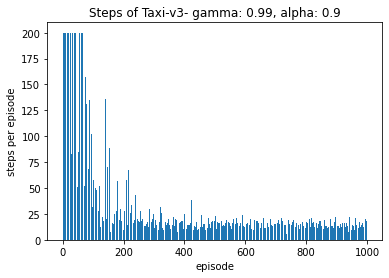

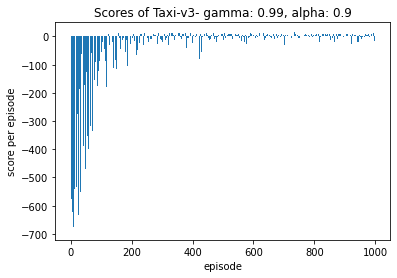

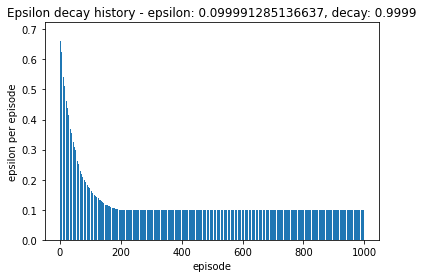

In [7]:
print('평균 steps : {}'.format(np.mean(steps)))

plt.bar(np.arange(len(steps)), steps)
plt.title("Steps of Taxi-v3- gamma: {}, alpha: {}".format(GAMMA, ALPHA))
plt.xlabel('episode')
plt.ylabel('steps per episode')
plt.show()

plt.bar(np.arange(len(scores)), scores)
plt.title("Scores of Taxi-v3- gamma: {}, alpha: {}".format(
                    GAMMA, ALPHA))
plt.xlabel('episode')
plt.ylabel('score per episode')
plt.show()

plt.bar(np.arange(len(greedy)), greedy)
plt.title("Epsilon decay history - epsilon: {}, decay: {}".format(
                    epsilon, epsilon_decay))
plt.xlabel('episode')
plt.ylabel('epsilon per episode')
plt.show()

In [8]:
from IPython.display import clear_output
from time import sleep

for i, frame in enumerate(frames):
    clear_output(wait=True)
    print(frame['frame'])
    print(f"Timestep: {i + 1}")
    print(f"State: {frame['state']}")
    print(f"Action: {frame['action']}")
    print(f"Reward: {frame['reward']}")
    sleep(.5)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 150
State: 418
Action: 5
Reward: 20
